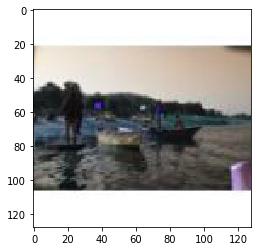

(128, 128, 3)
853
(853, 128, 128, 3)


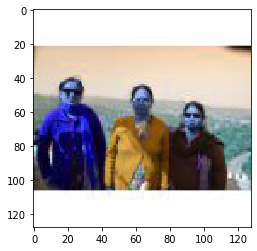

(128, 128, 3)
61


(61,)

In [118]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

import keras.backend as K
K.set_image_data_format('channels_last')
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline
import os
import cv2

DATADIR = "in_dir"
CATEGORIES = ["non-notes","notes"]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category) #path to notes or non-notes dir
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array, (128,128))
        plt.imshow(img_array)
        plt.show()
        break
    break
    

print(img_array.shape)

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category) #path to notes or non-notes dir
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                img_array=cv2.resize(img_array, (128,128))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

print(len(training_data))

import random
random.shuffle(training_data)

X_train=[]
Y_train=[]

for features,label in training_data:
    X_train.append(features)
    Y_train.append(label)
    
X_train=np.array(X_train)
np.reshape(X_train,(-1,128,128,3))
print(X_train.shape)
Y_train=np.array(Y_train).reshape(-1)

import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train,pickle_out)
pickle_out.close()

pickle_in=open("X_train.pickle","rb")
X_train=pickle.load(pickle_in)

X_train[8]

pickle_in=open("Y_train.pickle","rb")
Y_train=pickle.load(pickle_in)

Y_train.shape

DATADIR = "test_dir"
CATEGORIES = ["testset"]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category) #path to test dir
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array, (128,128))
        plt.imshow(img_array)
        plt.show()
        break
    break
       

print(img_array.shape)

test_data=[]
def create_test_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category) #path to test dir
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                img_array=cv2.resize(img_array, (128,128))
                test_data.append([img_array, class_num])
            except Exception as e:
                pass
            
create_test_data()

print(len(test_data))

random.shuffle(test_data)

X_test=[]
Y_test=[]

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)
    
X_test=np.array(X_test).reshape(-1,128,128,3)
Y_test=np.array(Y_test).reshape(-1)
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test,pickle_out)
pickle_out.close()

pickle_in=open("X_test.pickle","rb")
X_test=pickle.load(pickle_in)
X_test.shape

pickle_in=open("Y_test.pickle","rb")
Y_test=pickle.load(pickle_in)
Y_test.shape

In [119]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

In [120]:
cnn1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',padding = 'same',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [125]:
adam = tf.keras.optimizers.Adam(lr=0.003)

cnn1.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

cnn1.fit(X_train,Y_train,epochs=20,batch_size=20,validation_split=0.1)


Train on 767 samples, validate on 86 samples
Epoch 1/20
767/767 [==============================] - 23s 30ms/step - loss: 0.0399 - acc: 0.9896 - val_loss: 0.0505 - val_acc: 0.9884
Epoch 2/20
767/767 [==============================] - 20s 26ms/step - loss: 0.0270 - acc: 0.9896 - val_loss: 0.0267 - val_acc: 0.9884
Epoch 3/20
767/767 [==============================] - 21s 28ms/step - loss: 0.0385 - acc: 0.9935 - val_loss: 0.0620 - val_acc: 0.9767
Epoch 4/20
767/767 [==============================] - 21s 28ms/step - loss: 0.0117 - acc: 0.9935 - val_loss: 0.2533 - val_acc: 0.9767
Epoch 5/20
767/767 [==============================] - 21s 27ms/step - loss: 0.0457 - acc: 0.9935 - val_loss: 0.0305 - val_acc: 0.9767
Epoch 6/20
767/767 [==============================] - 21s 27ms/step - loss: 0.0120 - acc: 0.9935 - val_loss: 0.0359 - val_acc: 0.9884
Epoch 7/20
767/767 [==============================] - 22s 28ms/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.0631 - val_acc: 0.9884
Epoch 8/20
767/76

In [126]:
cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 12, 12, 128)       73856     
__________

In [127]:
cnn1.save('Mymodel.h5')


In [128]:
val_loss,val_acc=cnn1.evaluate(X_test,Y_test)
print(val_loss,val_acc)

61/61 [==============================] - 1s 9ms/step
1.0106147439753423 0.9016393462165457


In [129]:
cnn1.save_weights('weights.h5')